In [1]:
import os
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

import h5py    

/opt/anaconda/envs/ai/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/opt/anaconda/envs/ai/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = tf.keras.datasets.mnist
(x_train_mnist, y_train_mnist),(x_test_mnist, y_test_mnist) = mnist.load_data()
x_train_mnist, x_test_mnist = x_train_mnist / 255.0, x_test_mnist / 255.0
x = np.concatenate((x_train_mnist,x_test_mnist))
y = np.concatenate((y_train_mnist,y_test_mnist))

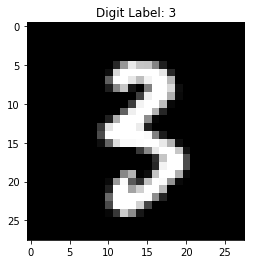

In [3]:
# First row is first image
idx = 45000
first_image = x[idx]
first_label = y[idx]

def plot_mnist(image, label):    
    # 784 columns correspond to 28x28 image
    plottable_image = np.reshape(image, (28, 28))

    # Plot the image
    plt.imshow(plottable_image, cmap='gray')
    plt.title('Digit Label: {}'.format(label))
    plt.show()

plot_mnist(first_image, first_label)

In [4]:
def splitMNIST(x, y, anom_class, test_ratio=0.2):   
    """
    :param x: 28 by 28 input data.
    :param y: Label for each input data (isn't used)
    :param test_ratio: how much of NORMAL x is to be held out as test data
    """
    x_normal = x[y!=anom_class]
    x_anomaly = x[y==anom_class]
    
    rand_indx = np.arange(x_normal.shape[0])
    np.random.shuffle(rand_indx)
    x_normal = x_normal[rand_indx]
    test_normal_size = int((1-test_ratio)*x_normal.shape[0])
    x_train_normal, x_test_normal = x_normal[:test_normal_size,:,:], x_normal[test_normal_size:,:,:]

    return x_train_normal, x_test_normal, x_anomaly

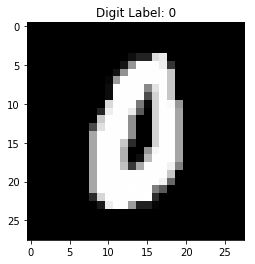

In [5]:
a, b, c = splitMNIST(x, y, anom_class=0, test_ratio=0.2)
plot_mnist(c[741], 0)

In [6]:
# Train and test set
file_path = '../../tests/resources'

for i in range(10):
    print('Preparing data set where the anomaly class is ', i)
    x_train_normal, x_test_normal, x_test_abnormal = splitMNIST(x, y, anom_class=i, test_ratio=0.2)
    SAMPLE_TYPES = ['NORMAL', 'ABNORMAL']
    samples_train = {}
    samples_test = {}

    for sample_type in SAMPLE_TYPES:
      if sample_type is 'NORMAL':
        samples_train[sample_type] = x_train_normal
        samples_test[sample_type] = x_test_normal
      elif sample_type is 'ABNORMAL':
        samples_test[sample_type] = x_test_abnormal   
        
    # Train and test data file
    train_data_file = os.path.join(file_path, 'mnist_data_train_abnormalclass-{}.hd5'.format(i))
    test_data_file = os.path.join(file_path, 'mnist_data_test_abnormalclass-{}.hd5'.format(i))

    h_train = h5py.File(train_data_file, 'w')
    h_test = h5py.File(test_data_file, 'w')
    
    for k, v in samples_train.items():
        h_train.create_dataset(k, data=np.array(v, dtype=np.float32), compression='gzip', compression_opts=9)
        
    for k, v in samples_test.items():
        h_test.create_dataset(k, data=np.array(v, dtype=np.float32), compression='gzip', compression_opts=9)
        
    h_train.close()
    h_test.close()

Preparing data set where the anomaly class is  0
Preparing data set where the anomaly class is  1
Preparing data set where the anomaly class is  2
Preparing data set where the anomaly class is  3
Preparing data set where the anomaly class is  4
Preparing data set where the anomaly class is  5
Preparing data set where the anomaly class is  6
Preparing data set where the anomaly class is  7
Preparing data set where the anomaly class is  8
Preparing data set where the anomaly class is  9


In [7]:
h5file = h5py.File('{}/mnist_data_test_abnormalclass-{}.hd5'.format(file_path, 1), 'r')
data = np.array(h5file['ABNORMAL'])
data.shape

(7877, 28, 28)